In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
pd.set_option('display.max_columns', None)
# eye candy plots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [41]:
df = pd.read_csv("../../data/processed/3_aggregated_pueblos.csv")
df.shape
df = df.dropna(subset=['koppen_climate'])

In [42]:
df

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,55+,male,female,total_population,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,town_size,connectivity_score,connectivity_category,towns_in_vicinity,economy_score,economy_score_area,autonomous_community,hospital_distance_score,school_distance_score,hospital_score_area,school_score_area,train_distance_score,airport_distance_score,transport_score
0,48067,Bizkaia,Muxika,18.95764,-2.692941,43.28967,302,96,101,463,584,810,736,1546,Aeropuerto de Bilbao,17.538797,Vitoria/Gasteiz,49.813235,12.530042,Hospital Galdakao-Usansolo,0.288898,Urretxindorra Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,784.0,Mid,0.7180,Good,"1002, 1003, 1004, 1010, 1018, 1036, 1042, 1054...",4.10,16.823071,País Vasco,6,10,3.0,5.0,1,6,3.5
1,15064,A Coruña,Paderne,151.44100,-8.176355,43.28677,265,119,160,648,1199,1173,1218,2391,Aeropuerto de A Coruña,16.418949,Betanzos-Cidade,3.219046,18.060709,Hospital Maritimo De Oza,2.891490,CPR Plurilingüe Nuestra Señora del Carmen,Csb,"Mediterranean Warm Summer - Cooler, wet winter...",1277.0,Mid,0.8460,Excellent,"15001, 15003, 15006, 15009, 15010, 15021, 1502...",5.90,14.034524,Galicia,4,10,2.0,5.0,10,6,8.0
2,15039,A Coruña,Irixoa,362.87660,-8.058925,43.28474,119,61,95,364,694,666,667,1333,Aeropuerto de A Coruña,25.929988,Oza Dos Rios,12.729931,24.662261,Hospital Juan Cardona,2.337612,CPI Plurilingüe Virxe da Cela,Cfb,Oceanic Climate - Mild temperatures and consis...,788.0,Mid,0.6420,Good,"15001, 15003, 15009, 15010, 15021, 15024, 1502...",0.00,8.933750,Galicia,3,10,1.5,5.0,6,6,6.0
3,48062,Bizkaia,Mendata,107.88860,-2.633333,43.28333,58,28,32,113,151,201,181,382,Aeropuerto de Bilbao,22.420417,Vitoria/Gasteiz,49.185946,16.396774,Hospital Galdakao-Usansolo,3.845322,Munitibar Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,213.0,Small,0.7410,Good,"1002, 1003, 1018, 1036, 1042, 1063, 20003, 200...",0.00,15.153360,País Vasco,4,10,2.0,5.0,1,6,3.5
4,48905,Bizkaia,Zamudio,44.55854,-2.866667,43.28333,528,226,291,1016,1251,1650,1662,3312,Aeropuerto de Bilbao,3.998229,Vitoria/Gasteiz,51.562825,4.828458,Imq Clínica Virgen Blanca,0.272147,Zamudio Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,1497.0,Big,0.9425,Excellent,"1002, 1003, 1004, 1010, 1018, 1036, 1042, 1054...",35.25,31.005961,País Vasco,10,10,5.0,5.0,1,10,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,11007,Cádiz,Barbate,15.97273,-5.918903,36.19282,3720,1797,2572,6793,7843,11326,11399,22725,Helipuerto de Algeciras,43.604312,Los Barrios,41.263907,28.159006,Hospital Viamed Novo Sancti Petri,0.084531,C.E.I.P. Estrella del Mar,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",11870.0,Big,0.9915,Excellent,"11001, 11014, 11015, 11025, 11031, 11035, 1103...",69.35,98.668750,Andalucía,2,10,1.0,5.0,1,4,2.5
7612,11022,Cádiz,"Línea de la Concepción, La",10.40490,-5.348256,36.16118,11924,4933,8008,19871,20251,32036,32951,64987,Helipuerto de Algeciras,9.068408,San Roque-La Linea,9.561508,1.236263,Hospital De La Línea De La Concepción,0.343316,C.D.P. Providencia del Sagrado Corazón,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",29253.0,Big,0.9830,Excellent,"11004, 11013, 11021, 11033, 11035, 29041, 2905...",167.90,160.098442,Andalucía,10,10,5.0,5.0,8,10,9.0
7613,11004,Cádiz,Algeciras,22.40544,-5.447698,36.12978,24311,10234,13808,38778,37916,61554,63493,125047,Helipuerto de Algeciras,0.632320,Algeciras,0.383585,2.095711,Hospital Punta De Europa,0.187878,I.E.S. Levante,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",54701.0,Big,0.9525,Excellent,"11013, 11021, 11022, 11033, 11035, 29041, 2906...",383.25,248.112500,Andalucía,10,10,5.0,5.0,10,10,10.0
7614,11035,Cádiz,Tarifa,14

In [43]:
df = df.drop(['cmun', 'municipality', 'towns_in_vicinity','province', 'autonomous_community', 'altitude','connectivity_category', 'description', 'closest_distance_airport', 'nearest_airport','nearest_train_station', 'closest_distance_train', 'closest_distance_hospital', 'nearest_hospital', 'closest_distance_school', 'nearest_school', 'longitude', 'latitude', 'male'], axis=1)

In [44]:
df

,0-17,18-24,25-34,35-54,55+,female,total_population,koppen_climate,number_of_houses,town_size,connectivity_score,economy_score,economy_score_area,hospital_distance_score,school_distance_score,hospital_score_area,school_score_area,train_distance_score,airport_distance_score,transport_score
0,302,96,101,463,584,736,1546,Cfb,784.0,Mid,0.7180,4.10,16.823071,6,10,3.0,5.0,1,6,3.5
1,265,119,160,648,1199,1218,2391,Csb,1277.0,Mid,0.8460,5.90,14.034524,4,10,2.0,5.0,10,6,8.0
2,119,61,95,364,694,667,1333,Cfb,788.0,Mid,0.6420,0.00,8.933750,3,10,1.5,5.0,6,6,6.0
3,58,28,32,113,151,181,382,Cfb,213.0,Small,0.7410,0.00,15.153360,4,10,2.0,5.0,1,6,3.5
4,528,226,291,1016,1251,1662,3312,Cfb,1497.0,Big,0.9425,35.25,31.005961,10,10,5.0,5.0,1,10,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,3720,1797,2572,6793,7843,11399,22725,Csa,11870.0,Big,0.9915,69.35,98.668750,2,10,1.0,5.0,1,4,2.5
7612,11924,4933,8008,19871,20251,32951,64987,Csa,29253.0,Big,0.9830,167.90,160.098442,10,10,5.0,5.0,8,10,9.0
7613,24311,10234,13808,38778,37916,63493,125047,Csa,54701.0,Big,0.9525,383.25,248.112500,10,10,5.0,5.0,10,10,10.0
7614,2983,1261,2021,6330,6062,9332,18657,Csa,12100.0,Big,0.9335,92.60,134.566667,4,10,2.0,5.0,4,6,5.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0-17'),
  Text(1, 0, '18-24'),
  Text(2, 0, '25-34'),
  Text(3, 0, '35-54'),
  Text(4, 0, '55+'),
  Text(5, 0, 'female'),
  Text(6, 0, 'total_population'),
  Text(7, 0, 'number_of_houses'),
  Text(8, 0, 'connectivity_score'),
  Text(9, 0, 'economy_score'),
  Text(10, 0, 'economy_score_area'),
  Text(11, 0, 'hospital_distance_score'),
  Text(12, 0, 'school_distance_score'),
  Text(13, 0, 'hospital_score_area'),
  Text(14, 0, 'school_score_area'),
  Text(15, 0, 'train_distance_score'),
  Text(16, 0, 'airport_distance_score'),
  Text(17, 0, 'transport_score')])

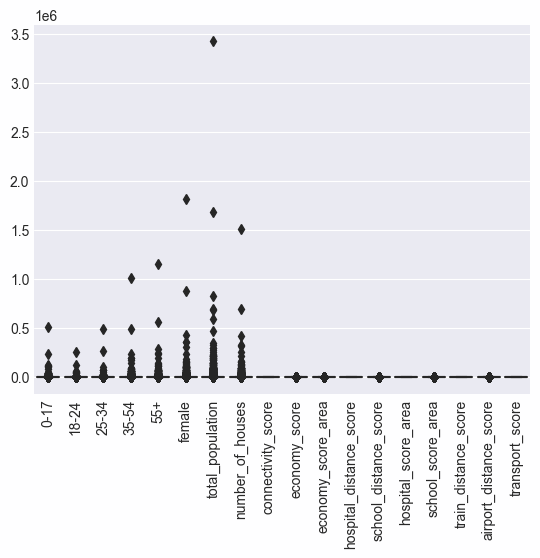

In [45]:
sns.boxplot(df, color="teal")
plt.xticks(rotation=90)

In [51]:
# Define age group columns
age_groups = ["0-17", "18-24", "25-34", "35-54", "55+"]

# Sum only the age group columns
df["total_population"] = df[age_groups].sum(axis=1)

# Compute percentages for each age group
for col in age_groups:
    df[col + "_pct"] = (df[col] / df["total_population"]) * 100


In [52]:
df

,0-17,18-24,25-34,35-54,55+,female,total_population,koppen_climate,number_of_houses,town_size,connectivity_score,economy_score,economy_score_area,hospital_distance_score,school_distance_score,hospital_score_area,school_score_area,train_distance_score,airport_distance_score,transport_score,0-17_pct,18-24_pct,25-34_pct,35-54_pct,55+_pct
0,302,96,101,463,584,736,1546,Cfb,784.0,Mid,0.7180,4.10,16.823071,6,10,3.0,5.0,1,6,3.5,19.534282,6.209573,6.532988,29.948254,37.774903
1,265,119,160,648,1199,1218,2391,Csb,1277.0,Mid,0.8460,5.90,14.034524,4,10,2.0,5.0,10,6,8.0,11.083229,4.976997,6.691761,27.101631,50.146382
2,119,61,95,364,694,667,1333,Cfb,788.0,Mid,0.6420,0.00,8.933750,3,10,1.5,5.0,6,6,6.0,8.927232,4.576144,7.126782,27.306827,52.063016
3,58,28,32,113,151,181,382,Cfb,213.0,Small,0.7410,0.00,15.153360,4,10,2.0,5.0,1,6,3.5,15.183246,7.329843,8.376963,29.581152,39.528796
4,528,226,291,1016,1251,1662,3312,Cfb,1497.0,Big,0.9425,35.25,31.005961,10,10,5.0,5.0,1,10,5.5,15.942029,6.823671,8.786232,30.676329,37.771739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,3720,1797,2572,6793,7843,11399,22725,Csa,11870.0,Big,0.9915,69.35,98.668750,2,10,1.0,5.0,1,4,2.5,16.369637,7.907591,11.317932,29.892189,34.512651
7612,11924,4933,8008,19871,20251,32951,64987,Csa,29253.0,Big,0.9830,167.90,160.098442,10,10,5.0,5.0,8,10,9.0,18.348285,7.590749,12.322464,30.576885,31.161617
7613,24311,10234,13808,38778,37916,63493,125047,Csa,54701.0,Big,0.9525,383.25,248.112500,10,10,5.0,5.0,10,10,10.0,19.441490,8.184123,11.042248,31.010740,30.321399
7614,2983,1261,2021,6330,6062,9332,18657,Csa,12100.0,Big,0.9335,92.60,134.566667,4,10,2.0,5.0,4,6,5.0,15.988637,6.758857,10.832395,33.928284,32.491826


In [53]:
# Define weights for age score
weights = {
    "0-17_pct": 0.5,
    "18-24_pct": 1.0,
    "25-34_pct": 2.0,
    "35-54_pct": 1.5,
    "55+_pct": -1.5  # Negative because higher elderly % means aging town
}

# Compute weighted score
df["age_score"] = sum(df[col] * weight for col, weight in weights.items())

df


,0-17,18-24,25-34,35-54,55+,female,total_population,koppen_climate,number_of_houses,town_size,connectivity_score,economy_score,economy_score_area,hospital_distance_score,school_distance_score,hospital_score_area,school_score_area,train_distance_score,airport_distance_score,transport_score,0-17_pct,18-24_pct,25-34_pct,35-54_pct,55+_pct,age_score
0,302,96,101,463,584,736,1546,Cfb,784.0,Mid,0.7180,4.10,16.823071,6,10,3.0,5.0,1,6,3.5,19.534282,6.209573,6.532988,29.948254,37.774903,17.302717
1,265,119,160,648,1199,1218,2391,Csb,1277.0,Mid,0.8460,5.90,14.034524,4,10,2.0,5.0,10,6,8.0,11.083229,4.976997,6.691761,27.101631,50.146382,-10.664994
2,119,61,95,364,694,667,1333,Cfb,788.0,Mid,0.6420,0.00,8.933750,3,10,1.5,5.0,6,6,6.0,8.927232,4.576144,7.126782,27.306827,52.063016,-13.840960
3,58,28,32,113,151,181,382,Cfb,213.0,Small,0.7410,0.00,15.153360,4,10,2.0,5.0,1,6,3.5,15.183246,7.329843,8.376963,29.581152,39.528796,16.753927
4,528,226,291,1016,1251,1662,3312,Cfb,1497.0,Big,0.9425,35.25,31.005961,10,10,5.0,5.0,1,10,5.5,15.942029,6.823671,8.786232,30.676329,37.771739,21.724034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,3720,1797,2572,6793,7843,11399,22725,Csa,11870.0,Big,0.9915,69.35,98.668750,2,10,1.0,5.0,1,4,2.5,16.369637,7.907591,11.317932,29.892189,34.512651,31.797580
7612,11924,4933,8008,19871,20251,32951,64987,Csa,29253.0,Big,0.9830,167.90,160.098442,10,10,5.0,5.0,8,10,9.0,18.348285,7.590749,12.322464,30.576885,31.161617,40.532722
7613,24311,10234,13808,38778,37916,63493,125047,Csa,54701.0,Big,0.9525,383.25,248.112500,10,10,5.0,5.0,10,10,10.0,19.441490,8.184123,11.042248,31.010740,30.321399,41.023375
7614,2983,1261,2021,6330,6062,9332,18657,Csa,12100.0,Big,0.9335,92.60,134.566667,4,10,2.0,5.0,4,6,5.0,15.988637,6.758857,10.832395,33.928284,32.491826,38.572654


In [54]:
df.columns

Index(['0-17', '18-24', '25-34', '35-54', '55+', 'female', 'total_population',
       'koppen_climate', 'number_of_houses', 'town_size', 'connectivity_score',
       'economy_score', 'economy_score_area', 'hospital_distance_score',
       'school_distance_score', 'hospital_score_area', 'school_score_area',
       'train_distance_score', 'airport_distance_score', 'transport_score',
       '0-17_pct', '18-24_pct', '25-34_pct', '35-54_pct', '55+_pct',
       'age_score'],
      dtype='object')

In [56]:
def categorize_by_age_score(score):
    if score > 50:
        return "Very Young Town"
    elif score > 30:
        return "Young & Growing"
    elif score > 10:
        return "Balanced Town"
    elif score > 0:
        return "Aging Town"
    else:
        return "Highly Aging Town"

# Apply final categorization
df["final_age_category"] = df["age_score"].apply(categorize_by_age_score)




([0, 1, 2, 3, 4],
 [Text(0, 0, 'Balanced Town'),
  Text(1, 0, 'Highly Aging Town'),
  Text(2, 0, 'Very Young Town'),
  Text(3, 0, 'Young & Growing'),
  Text(4, 0, 'Aging Town')])

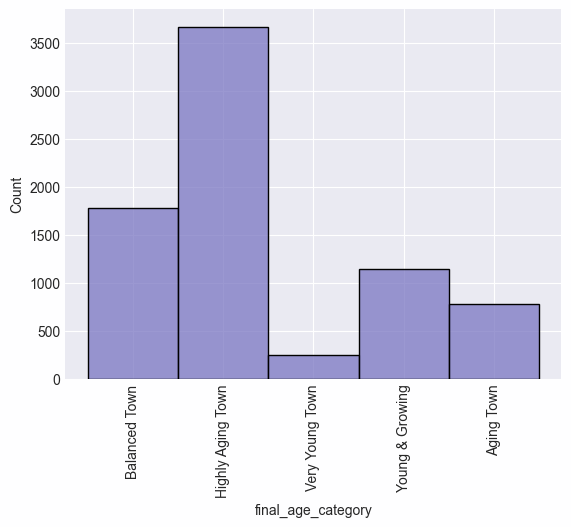

In [59]:
sns.histplot(df["final_age_category"])
plt.xticks(rotation=90)

In [60]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
scaler = StandardScaler()

pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first', sparse_output=False))
])

pipeline.fit(df[['koppen_climate', 'town_size', 'final_age_category']])

Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse_output=False))])

In [61]:
fe_transformer = ColumnTransformer(transformers=[
    ('transf_cat', pipeline, ['koppen_climate']),
    ('scaled', scaler, [
         'connectivity_score',
        'economy_score', 'economy_score_area',
        'hospital_distance_score', 'school_distance_score', 'hospital_score_area',
        'school_score_area', 'train_distance_score', 'airport_distance_score', 'transport_score'
    ])
], remainder='drop')

fe_transformer.fit(df)

ColumnTransformer(transformers=[('transf_cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['koppen_climate']),
                                ('scaled', StandardScaler(),
                                 ['connectivity_score', 'economy_score',
                                  'economy_score_area',
                                  'hospital_distance_score',
                                  'school_distance_score',
                                  'hospital_score_area', 'school_score_area',
                                  'train_distance_score',
                                  'airport_distance_score',
                                  'transport_score'])])

In [62]:
df_train = fe_transformer.transform(df)


array([[ 0.        ,  0.        ,  1.        , ..., -1.06392277,
         1.15594514, -0.28383358],
       [ 0.        ,  0.        ,  0.        , ...,  1.79474141,
         1.15594514,  1.95827505],
       [ 0.        ,  0.        ,  1.        , ...,  0.52422399,
         1.15594514,  0.96178232],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.79474141,
         3.24792356,  2.95476777],
       [ 0.        ,  0.        ,  0.        , ..., -0.11103471,
         1.15594514,  0.46353596],
       [ 0.        ,  0.        ,  0.        , ..., -0.74629342,
         3.24792356,  0.96178232]])

In [63]:
pd.DataFrame(df_train).to_csv("../../data/processed/cluster_model_train_marina.csv", index=False)